In [1]:
# Importing some basic libraries

In [424]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading our dataset

In [425]:
df= pd.read_csv('Automobile_insurance_fraud.csv')

In [426]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


So we have total 1000 rows × 40 columns

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [428]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

So in authorities_contacted column we have 91 Null values

In [429]:
# _c39 has all values are null so it is better to remove this column

In [430]:
df.drop('_c39',axis=1,inplace=True)

In [431]:
df['police_report_available'].value_counts()

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

As we can see police_report_available column has 343 entries of ?

In [3]:
# Replacing ? to unknown

In [432]:
df['police_report_available'] = df['police_report_available'].replace('?', 'unknown')

In [433]:
df['police_report_available'].value_counts()

police_report_available
unknown    343
NO         343
YES        314
Name: count, dtype: int64

In [434]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64


age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64


policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: count, Length: 1000, dtype: int64


policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: count, L

In [4]:
# removing null rows

In [435]:
df.dropna(inplace=True)

In [436]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,unknown,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,unknown,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,unknown,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [437]:
df.policy_number.value_counts()

policy_number
521585    1
797634    1
261905    1
674485    1
223404    1
         ..
613226    1
804410    1
553565    1
399524    1
556080    1
Name: count, Length: 909, dtype: int64

In [438]:
# So in policy number column all the values are unique so we can drop this column

In [439]:
df.drop('policy_number',axis=1,inplace=True)

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           909 non-null    int64  
 1   age                          909 non-null    int64  
 2   policy_bind_date             909 non-null    object 
 3   policy_state                 909 non-null    object 
 4   policy_csl                   909 non-null    object 
 5   policy_deductable            909 non-null    int64  
 6   policy_annual_premium        909 non-null    float64
 7   umbrella_limit               909 non-null    int64  
 8   insured_zip                  909 non-null    int64  
 9   insured_sex                  909 non-null    object 
 10  insured_education_level      909 non-null    object 
 11  insured_occupation           909 non-null    object 
 12  insured_hobbies              909 non-null    object 
 13  insured_relationship     

In [5]:
# We have two Date columns one is policy_bind_date and the another one is incident_date. changing the columns into datetime format and separating year,month and day from that

In [441]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], format='%d-%m-%Y')
df['incident_date'] = pd.to_datetime(df['incident_date'], format='%d-%m-%Y')

df['policy_bind_year'] = df['policy_bind_date'].dt.year
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_day'] = df['policy_bind_date'].dt.day

df['incident_year'] = df['incident_date'].dt.year
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day

In [6]:
# dropping these columns

In [442]:
df.drop('policy_bind_date',axis=1,inplace=True)
df.drop('incident_date',axis=1,inplace=True)

In [443]:
df.nunique()

months_as_customer             384
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          903
umbrella_limit                  11
insured_zip                    904
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  312
capital-loss                   341
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            4
incident_state                   7
incident_city                    7
incident_location              909
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_available          3
total_claim_amount  

In [444]:
df['incident_location'].value_counts()

incident_location
9935 4th Drive         1
8639 5th Hwy           1
4835 Britain Ridge     1
8548 Cherokee Ridge    1
2352 MLK Drive         1
                      ..
6945 Texas Hwy         1
5639 1st Ridge         1
3834 Pine St           1
1358 Maple St          1
1416 Cherokee Ridge    1
Name: count, Length: 909, dtype: int64

In [445]:
# So all the values of incident location column is unique. thats mean we can drop this column 

In [446]:
df.drop('incident_location',axis=1,inplace=True)

In [447]:
# checking for duplicate columns. if present the drop this column
df1=df.T.drop_duplicates().T
print(df1)

    months_as_customer age policy_state policy_csl policy_deductable  \
0                  328  48           OH    250/500              1000   
1                  228  42           IN    250/500              2000   
2                  134  29           OH    100/300              2000   
3                  256  41           IL    250/500              2000   
5                  256  39           OH    250/500              1000   
..                 ...  ..          ...        ...               ...   
995                  3  38           OH   500/1000              1000   
996                285  41           IL    100/300              1000   
997                130  34           OH    250/500               500   
998                458  62           IL   500/1000              2000   
999                456  60           OH    250/500              1000   

    policy_annual_premium umbrella_limit insured_zip insured_sex  \
0                 1406.91              0      466132        MALE   

In [448]:
# Dropping all the duplicate rows
df.drop_duplicates(inplace=True)

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           909 non-null    int64  
 1   age                          909 non-null    int64  
 2   policy_state                 909 non-null    object 
 3   policy_csl                   909 non-null    object 
 4   policy_deductable            909 non-null    int64  
 5   policy_annual_premium        909 non-null    float64
 6   umbrella_limit               909 non-null    int64  
 7   insured_zip                  909 non-null    int64  
 8   insured_sex                  909 non-null    object 
 9   insured_education_level      909 non-null    object 
 10  insured_occupation           909 non-null    object 
 11  insured_hobbies              909 non-null    object 
 12  insured_relationship         909 non-null    object 
 13  capital-gains            

In [450]:
#transforming datatypes from object to numeric datatype by using OrdianlEncoder
#from sklearn.preprocessing import OrdinalEncoder
#OE=OrdinalEncoder()

In [451]:
#for i in df.columns:
    #if df.dtypes[i] == 'object':
        #df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [452]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,Saab,92x,2004,Y,2014,10,17,2015,1,25
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,Mercedes,E400,2007,Y,2006,6,27,2015,1,21
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,Dodge,RAM,2007,N,2000,9,6,2015,2,22
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,Chevrolet,Tahoe,2014,Y,1990,5,25,2015,1,10
5,256,39,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,...,Saab,95,2003,Y,2006,10,12,2015,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,Honda,Accord,2006,N,1991,7,16,2015,2,22
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,Volkswagen,Passat,2015,N,2014,1,5,2015,1,24
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,Suburu,Impreza,1996,N,2003,2,17,2015,1,23
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,Audi,A5,1998,N,2011,11,18,2015,2,26


In [453]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day
count,909.000000,909.000000,909.000000,909.000000,9.090000e+02,909.000000,909.000000,909.000000,909.000000,909.000000,...,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.0,909.000000,909.000000
mean,205.027503,39.040704,1131.463146,1256.597712,1.088009e+06,500597.042904,24823.652365,-26923.652365,12.062706,1.922992,...,8100.891089,8064.906491,41341.848185,2005.125413,2001.644664,6.522552,15.471947,2015.0,1.495050,14.926293
std,116.003078,9.192118,611.958791,245.236621,2.278747e+06,71474.927903,27719.509214,28277.509343,7.005145,1.031769,...,4615.021845,4552.940222,16253.292262,6.012991,7.400755,3.528797,8.815194,0.0,0.526006,8.648423
min,0.000000,19.000000,500.000000,484.670000,-1.000000e+06,430141.000000,0.000000,-111100.000000,0.000000,1.000000,...,0.000000,0.000000,70.000000,1995.000000,1990.000000,1.000000,1.000000,2015.0,1.000000,1.000000
25%,116.000000,32.000000,500.000000,1090.030000,0.000000e+00,448190.000000,0.000000,-51800.000000,6.000000,1.000000,...,5260.000000,5340.000000,34370.000000,2000.000000,1995.000000,3.000000,8.000000,2015.0,1.000000,8.000000
50%,202.000000,38.000000,1000.000000,1257.040000,0.000000e+00,466390.000000,0.000000,-22300.000000,13.000000,1.000000,...,7180.000000,7120.000000,43680.000000,2005.000000,2002.000000,7.000000,15.000000,2015.0,1.000000,15.000000
75%,278.000000,45.000000,2000.000000,1415.680000,0.000000e+00,602942.000000,50400.000000,0.000000,18.000000,3.000000,...,11700.000000,11260.000000,51680.000000,2010.000000,2008.000000,10.000000,23.000000,2015.0,2.000000,22.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,...,21450.000000,23670.000000,79560.000000,2015.000000,2015.000000,12.000000,31.000000,2015.0,3.000000,31.000000


'umbrella_limit', 'insured_zip', 'total_claim_amount', 'vehicle_claim', 'fraud_reported' these columns has skewness because mean is significantly different from the median values

and also umbrella_limit and total_claim_amount has outliers present because there is high jump between 75th percentile and the max values

In [7]:
# separating categorical and numerical column

In [454]:
cat_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtypes == "object":
        cat_col.append(i)
    else:
        num_col.append(i)

print('cat_col :',cat_col)
print("\n")
print('num_col :',num_col)

cat_col : ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


num_col : ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_bind_year', 'policy_bind_month', 'policy_bind_day', 'incident_year', 'incident_month', 'incident_day']


In [455]:
len(cat_col)

18

In [456]:
len(num_col)

23

In [457]:
df['insured_sex'].value_counts()

insured_sex
FEMALE    494
MALE      415
Name: count, dtype: int64

In [8]:
# plotting scatterplot for all of the columns with respect to months_as_customer column

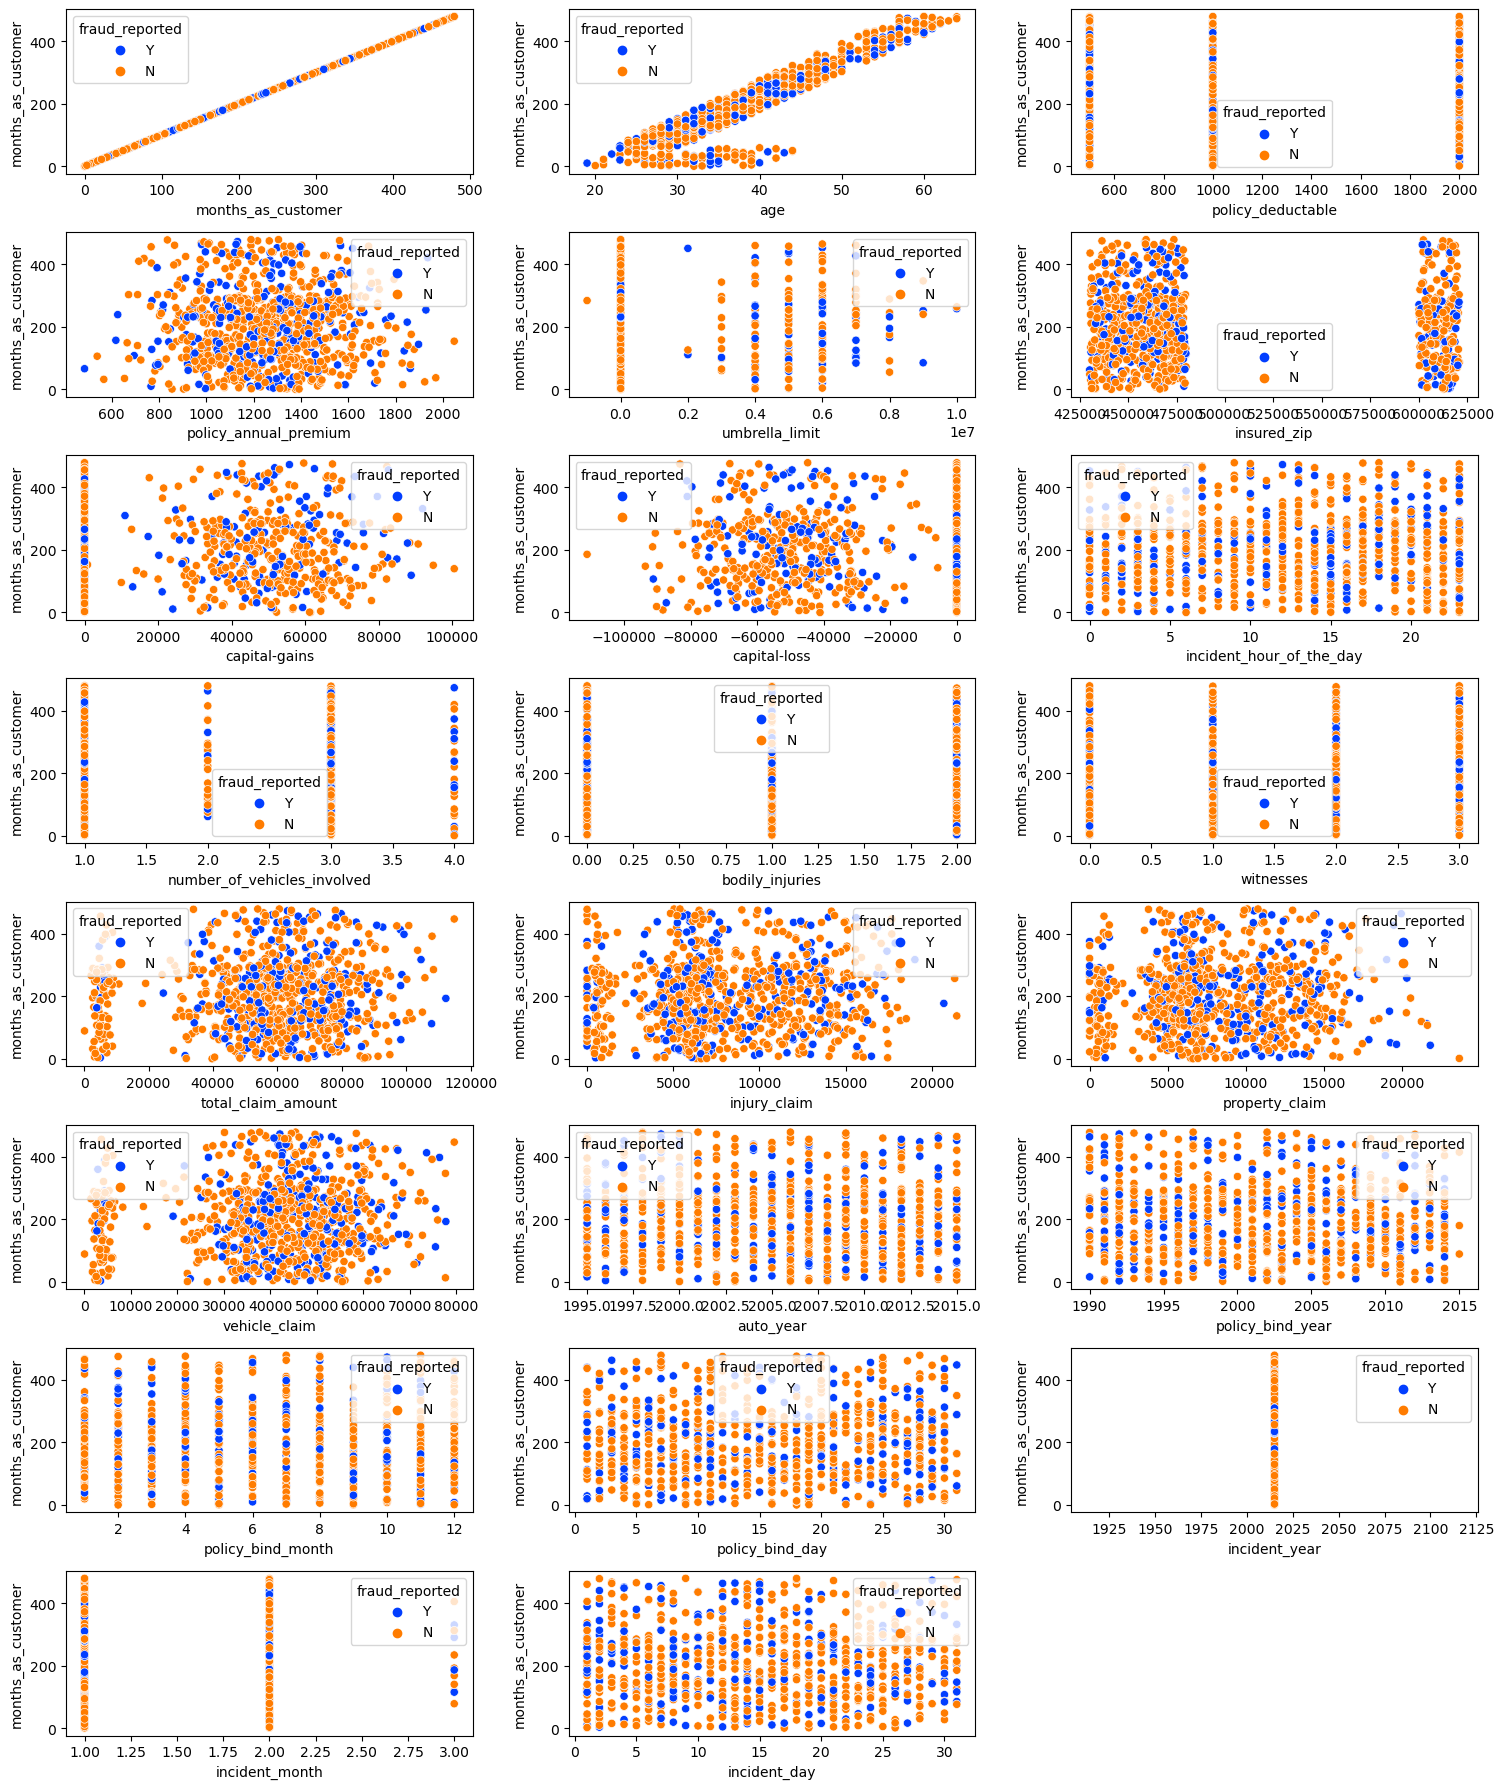

In [458]:
plt.figure(figsize=(15,18),facecolor='white')
p=1
for i in num_col:
    if p<=23:
        ax=plt.subplot(8,3,p)
        sns.scatterplot(y='months_as_customer',x=i,data =df,hue='fraud_reported',palette='bright')
        plt.xlabel(i)
    p+=1
plt.tight_layout()

so incident severity is moderately correlated with the target column (fraud_reported). otherwise every column has very less correlated with the target column

In [459]:
#transforming datatypes from object to numeric datatype by using OrdianlEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()

In [460]:
for i in df.columns:
    if df.dtypes[i] == 'object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [461]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day
0,328,48,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,...,10.0,1.0,2004,1.0,2014,10,17,2015,1,25
1,228,42,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,...,8.0,12.0,2007,1.0,2006,6,27,2015,1,21
2,134,29,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,...,4.0,30.0,2007,0.0,2000,9,6,2015,2,22
3,256,41,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,...,3.0,34.0,2014,1.0,1990,5,25,2015,1,10
5,256,39,2.0,1.0,1000,1351.10,0,478456,0.0,6.0,...,10.0,3.0,2003,1.0,2006,10,12,2015,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.0,2.0,1000,1310.80,0,431289,0.0,5.0,...,6.0,6.0,2006,0.0,1991,7,16,2015,2,22
996,285,41,0.0,0.0,1000,1436.79,0,608177,0.0,6.0,...,13.0,28.0,2015,0.0,2014,1,5,2015,1,24
997,130,34,2.0,1.0,500,1383.49,3000000,442797,0.0,5.0,...,11.0,19.0,1996,0.0,2003,2,17,2015,1,23
998,458,62,0.0,2.0,2000,1356.92,5000000,441714,1.0,0.0,...,1.0,5.0,1998,0.0,2011,11,18,2015,2,26


In [534]:
# In incident_year column all the years are 2015. thats mean its a constant column so we can drop this column 

In [462]:
df['incident_year'].value_counts()

incident_year
2015    909
Name: count, dtype: int64

In [463]:
df.drop('incident_year',axis=1,inplace=True)

In [9]:
# Plotting boxplot

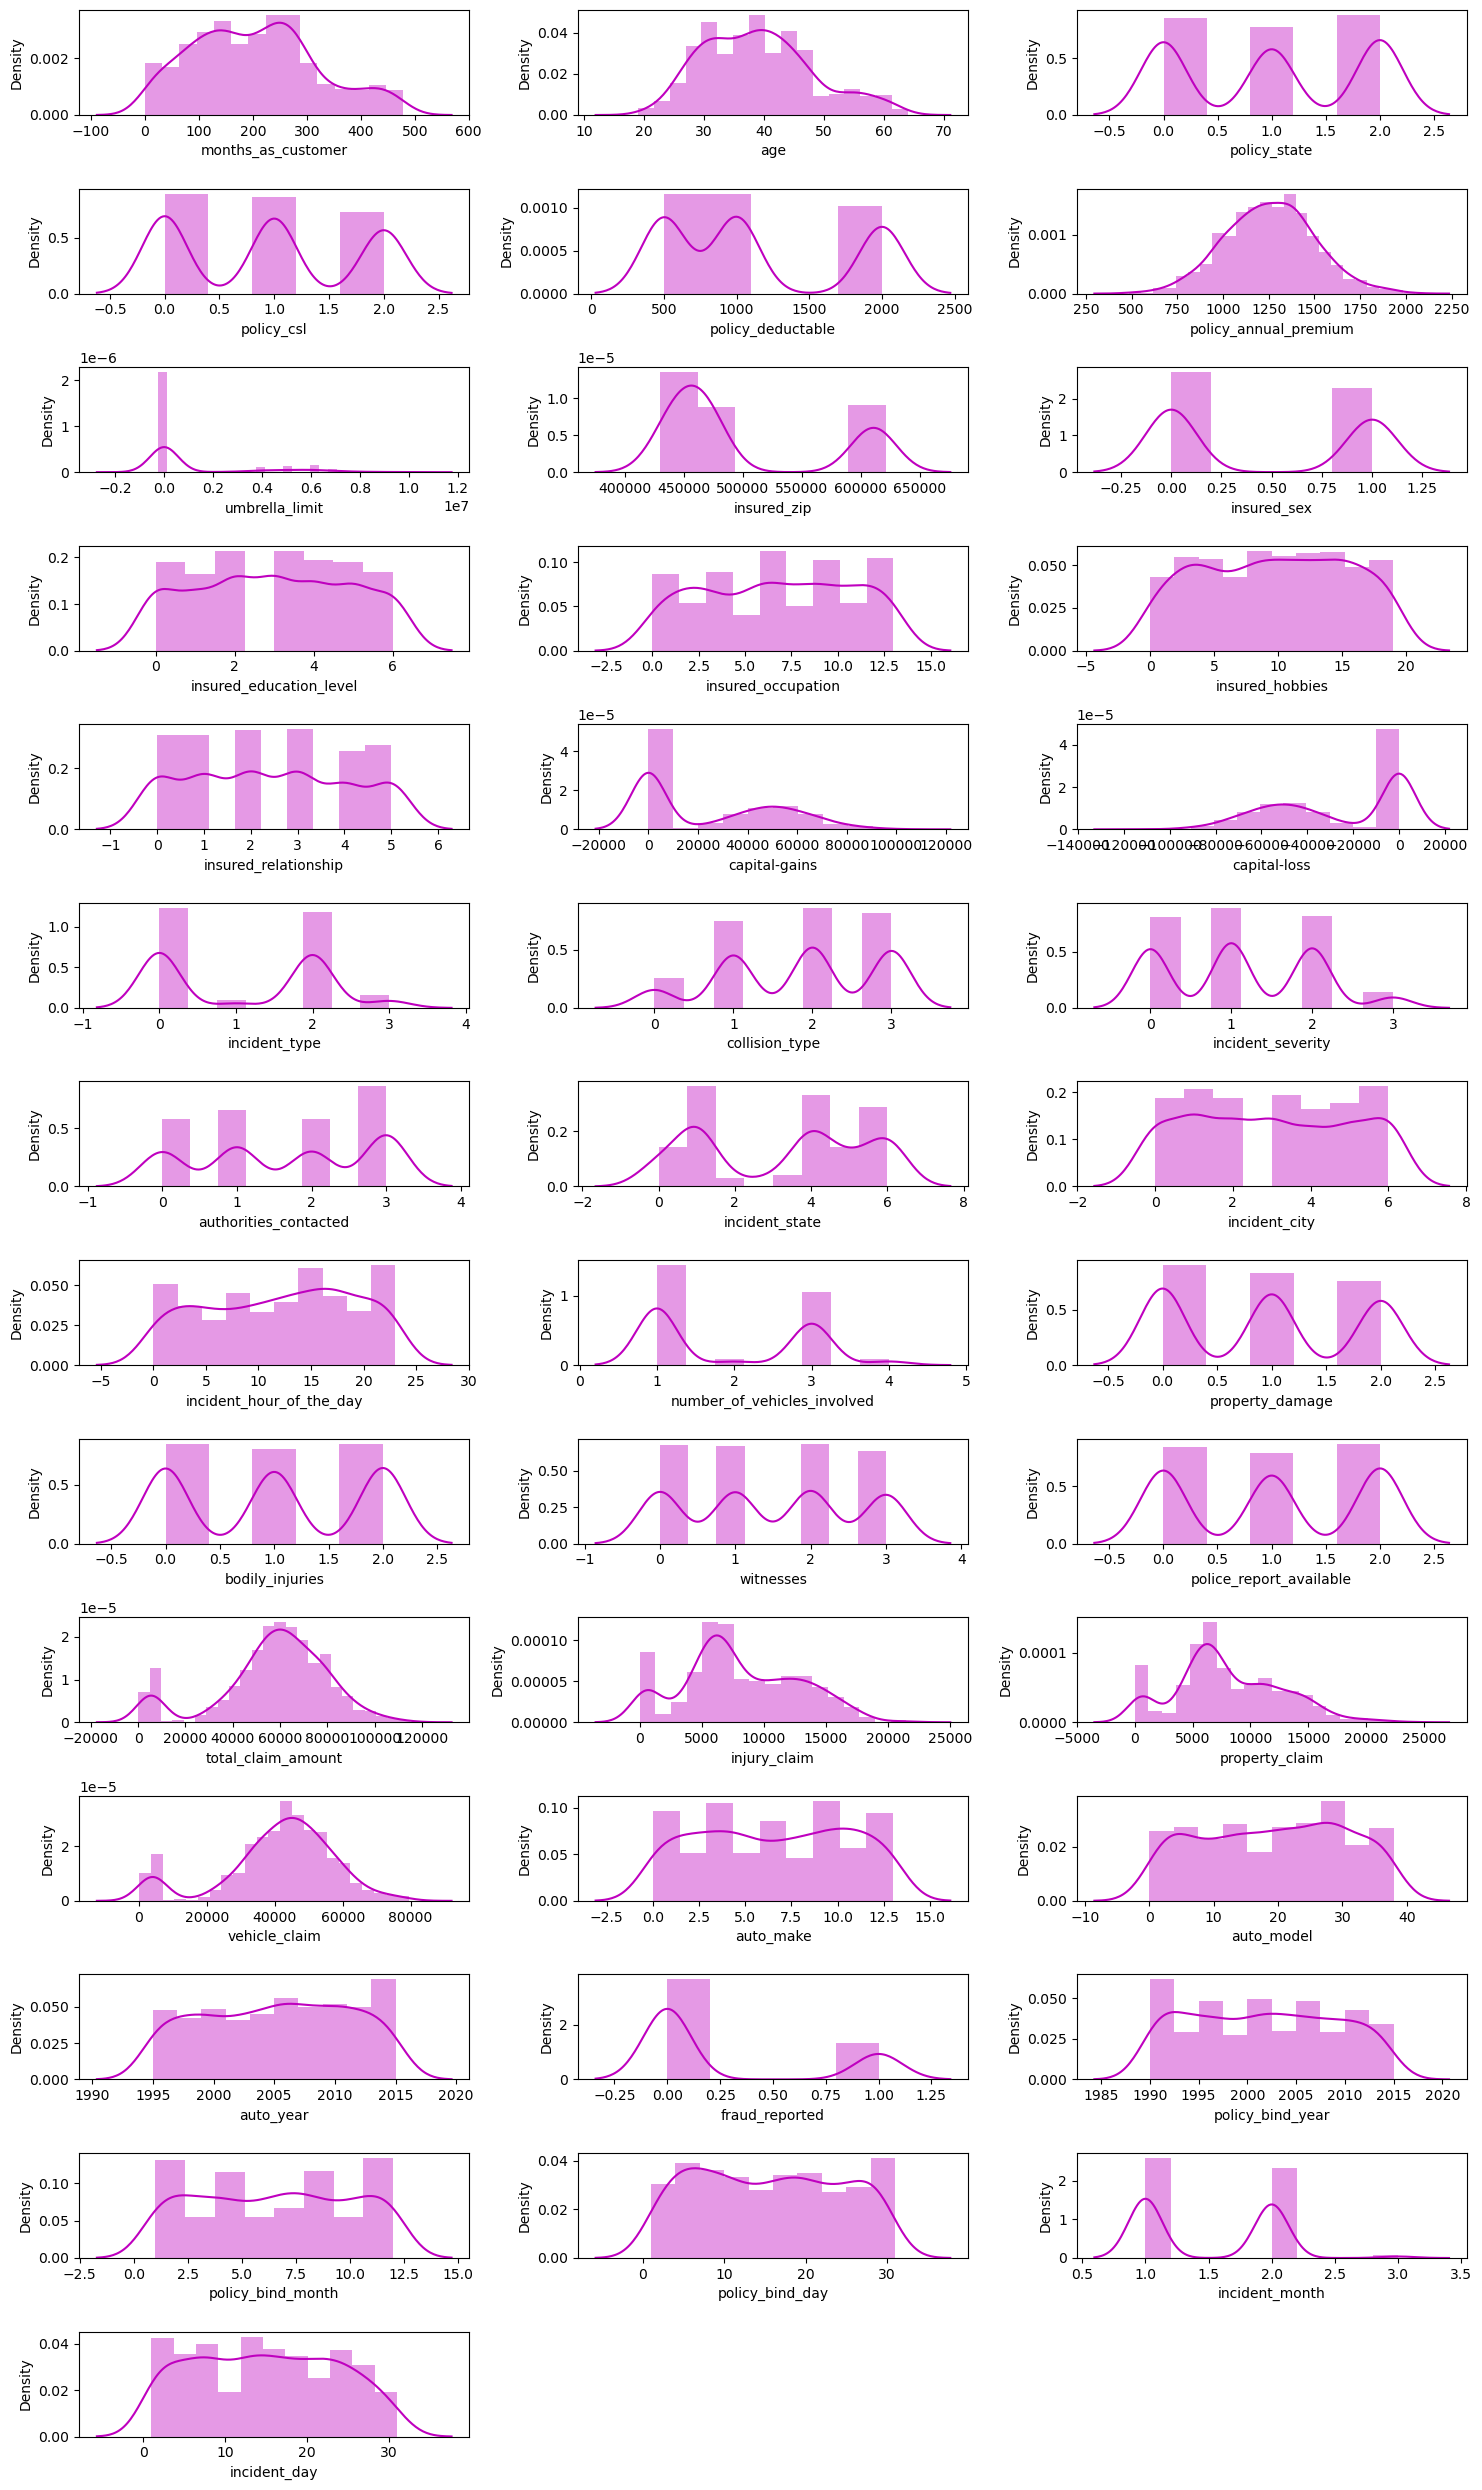

In [464]:
plt.figure(figsize=(15,25),facecolor='white')
p=1
for i in df.columns:
    if p<=42:
        ax=plt.subplot(14,3,p)
        sns.distplot(df[i],color='m')
        plt.xlabel(i)
    p+=1
plt.tight_layout()

So 'umbrella_limit', 'insured_zip', 'total_claim_amount', 'vehicle_claim', 'fraud_reported' columns has skewness present

In [465]:
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,incident_month,incident_day
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,9.090000e+02,909.000000,909.000000,909.000000,...,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,205.027503,39.040704,1.009901,0.935094,1131.463146,1256.597712,1.088009e+06,500597.042904,0.456546,2.977998,...,41341.848185,6.531353,19.218922,2005.125413,0.265127,2001.644664,6.522552,15.471947,1.495050,14.926293
std,116.003078,9.192118,0.832246,0.805522,611.958791,245.236621,2.278747e+06,71474.927903,0.498382,1.946860,...,16253.292262,4.037593,11.147363,6.012991,0.441644,7.400755,3.528797,8.815194,0.526006,8.648423
min,0.000000,19.000000,0.000000,0.000000,500.000000,484.670000,-1.000000e+06,430141.000000,0.000000,0.000000,...,70.000000,0.000000,0.000000,1995.000000,0.000000,1990.000000,1.000000,1.000000,1.000000,1.000000
25%,116.000000,32.000000,0.000000,0.000000,500.000000,1090.030000,0.000000e+00,448190.000000,0.000000,1.000000,...,34370.000000,3.000000,9.000000,2000.000000,0.000000,1995.000000,3.000000,8.000000,1.000000,8.000000
50%,202.000000,38.000000,1.000000,1.000000,1000.000000,1257.040000,0.000000e+00,466390.000000,0.000000,3.000000,...,43680.000000,7.000000,20.000000,2005.000000,0.000000,2002.000000,7.000000,15.000000,1.000000,15.000000
75%,278.000000,45.000000,2.000000,2.000000,2000.000000,1415.680000,0.000000e+00,602942.000000,1.000000,5.000000,...,51680.000000,10.000000,29.000000,2010.000000,1.000000,2008.000000,10.000000,23.000000,2.000000,22.000000
max,479.000000,64.000000,2.000000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,...,79560.000000,13.000000,38.000000,2015.000000,1.000000,2015.000000,12.000000,31.000000,3.000000,31.000000


'umbrella_limit', 'insured_zip', 'total_claim_amount', 'vehicle_claim', 'fraud_reported' these columns has skewness because mean is significantly different from the median values

and also umbrella_limit and total_claim_amount has outliers present because there is high jump between 75th percentile and the max values

In [10]:
# Checking skewness

In [466]:
df.skew()

months_as_customer             0.344423
age                            0.460979
policy_state                  -0.018538
policy_csl                     0.118197
policy_deductable              0.488610
policy_annual_premium          0.038394
umbrella_limit                 1.823273
insured_zip                    0.839633
insured_sex                    0.174766
insured_education_level       -0.003115
insured_occupation            -0.063590
insured_hobbies               -0.047187
insured_relationship           0.079521
capital-gains                  0.486071
capital-loss                  -0.392918
incident_type                  0.094440
collision_type                -0.293631
incident_severity              0.217916
authorities_contacted         -0.145115
incident_state                -0.125741
incident_city                  0.046627
incident_hour_of_the_day      -0.144768
number_of_vehicles_involved    0.341389
property_damage                0.107293
bodily_injuries               -0.004081


In [11]:
# Separating skewed column

In [467]:
skewed_col=[]
normal_col=[]
for i in df.columns:
    if df[i].skew() > 0.5 or df[i].skew() <-0.5:
        skewed_col.append(i)
    else:
        normal_col.append(i)

print("skewed_col :",skewed_col)
print('\n')
print('normal_col :',normal_col)

skewed_col : ['umbrella_limit', 'insured_zip', 'total_claim_amount', 'vehicle_claim', 'fraud_reported']


normal_col : ['months_as_customer', 'age', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'injury_claim', 'property_claim', 'auto_make', 'auto_model', 'auto_year', 'policy_bind_year', 'policy_bind_month', 'policy_bind_day', 'incident_month', 'incident_day']


In [12]:
# Removing skewness by square root technique

In [468]:
for i in skewed_col:
    df[i]=np.sqrt(df[i])

In [469]:
df.fraud_reported.value_counts()

fraud_reported
0.0    668
1.0    241
Name: count, dtype: int64

our target varible is not balanced

In [470]:
df.skew()

months_as_customer             0.344423
age                            0.460979
policy_state                  -0.018538
policy_csl                     0.118197
policy_deductable              0.488610
policy_annual_premium          0.038394
umbrella_limit                 1.586652
insured_zip                    0.823155
insured_sex                    0.174766
insured_education_level       -0.003115
insured_occupation            -0.063590
insured_hobbies               -0.047187
insured_relationship           0.079521
capital-gains                  0.486071
capital-loss                  -0.392918
incident_type                  0.094440
collision_type                -0.293631
incident_severity              0.217916
authorities_contacted         -0.145115
incident_state                -0.125741
incident_city                  0.046627
incident_hour_of_the_day      -0.144768
number_of_vehicles_involved    0.341389
property_damage                0.107293
bodily_injuries               -0.004081


In [13]:
# Plotting boxplot

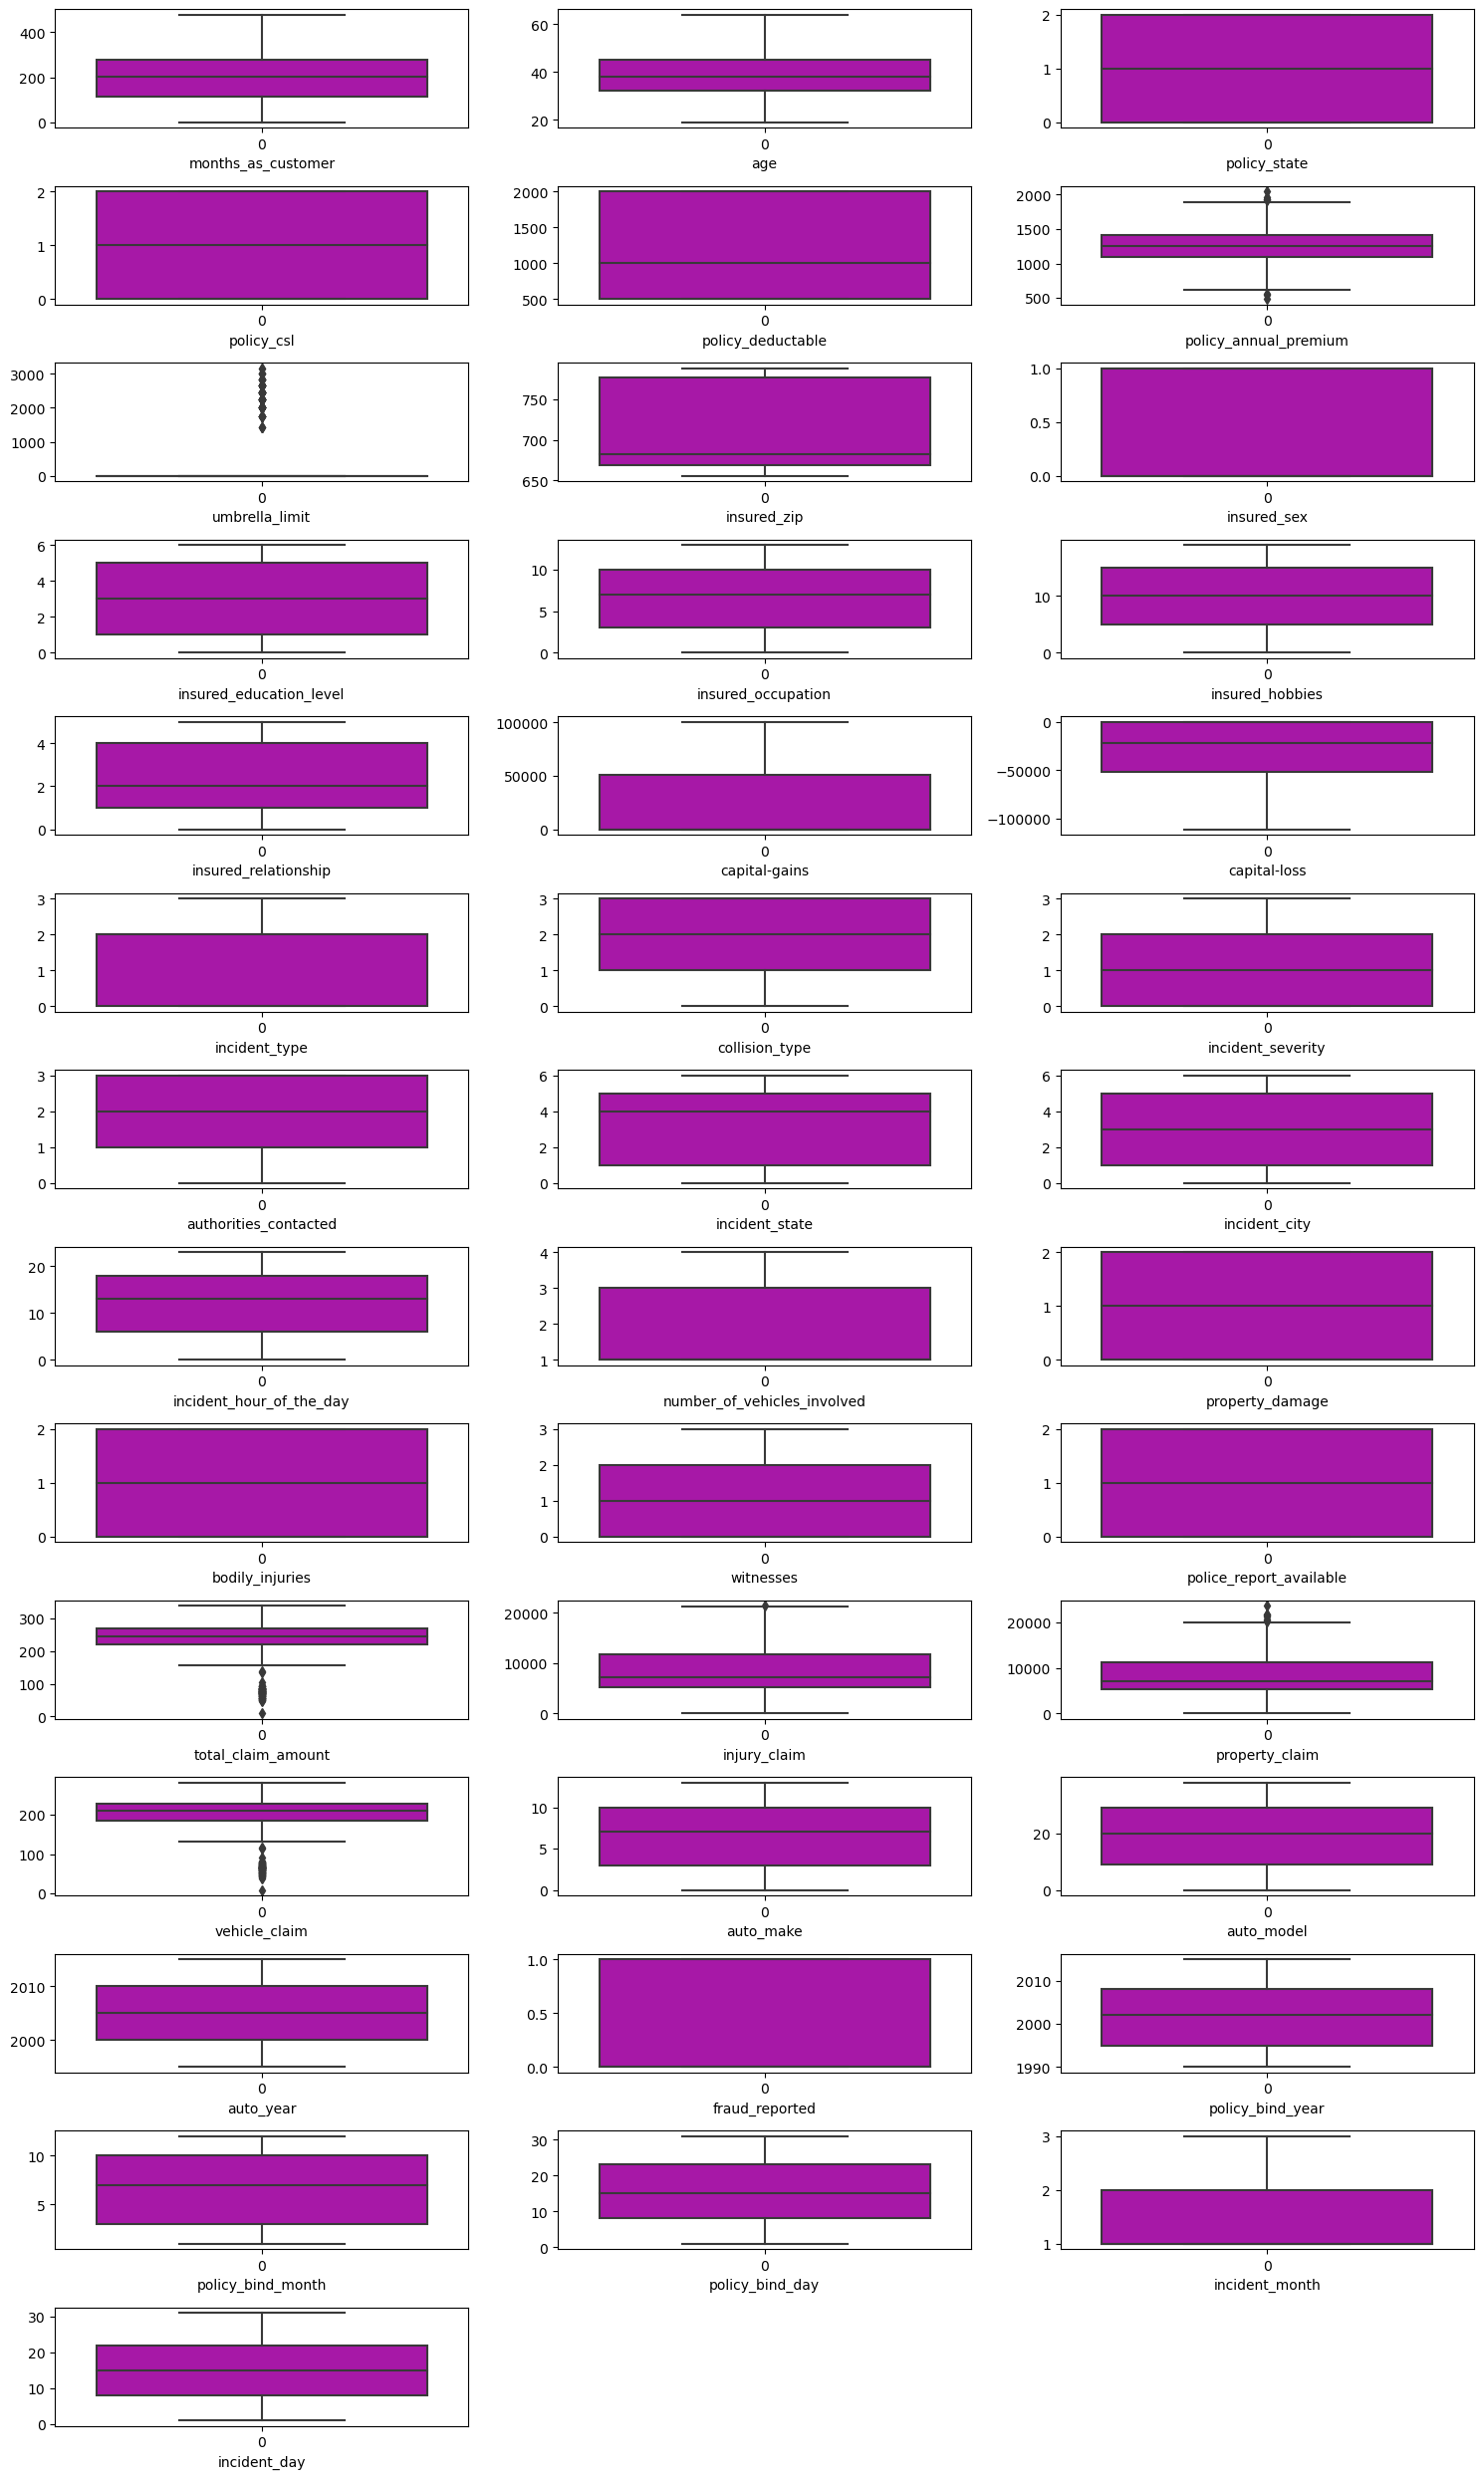

In [471]:
plt.figure(figsize=(15,25),facecolor='white')
p=1
for i in df.columns:
    if p<=42:
        ax=plt.subplot(14,3,p)
        sns.boxplot(df[i],color='m')
        plt.xlabel(i)
    p+=1
plt.tight_layout()

umbrella_limit and total_claim_amount has outliers present

In [14]:
# Importing zscore to remove outliers

In [472]:
from scipy.stats import zscore

In [473]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'policy_bind_year',
       'policy_bind_month', 'policy_bind_day', 'incident_month',
       'incident_day'],
      dtype='object')

In [474]:
a=['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year','policy_bind_year',
       'policy_bind_month', 'policy_bind_day',
       'incident_month', 'incident_day']

In [475]:
curr = df[a]

In [476]:
z=np.abs(zscore(curr))

In [477]:
print(np.where(z>3))

(array([ 48, 173, 201, 448, 472, 472, 536, 621, 697, 709, 709], dtype=int64), array([30, 27,  5, 29, 27, 30, 29, 30,  5, 27, 30], dtype=int64))


In [478]:
df_new = df[(z<3).all(axis=1)]

In [479]:
df_new

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,incident_month,incident_day


so no outliers are present

insured_sex
0.0    494
1.0    414
Name: count, dtype: int64

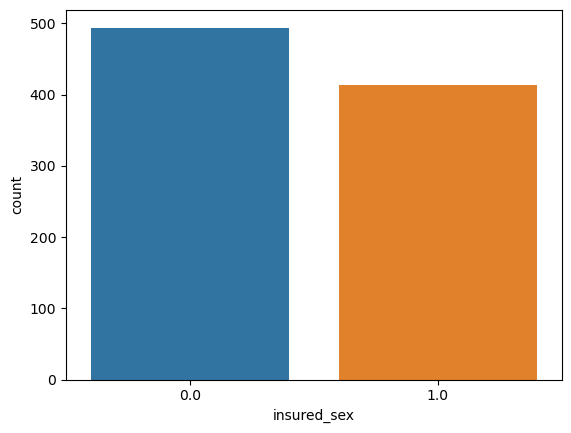

In [533]:
#visualize the no of insured_sex 
ax = sns.countplot(x='insured_sex',data = df)
df['insured_sex'].value_counts()

incident_state
1.0    246
4.0    225
6.0    196
5.0     96
0.0     96
3.0     29
2.0     20
Name: count, dtype: int64

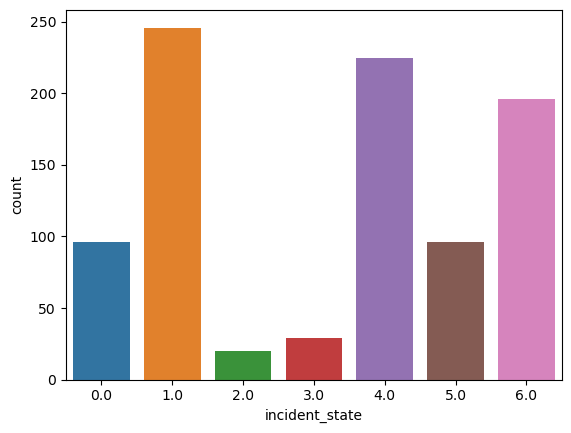

In [532]:
#visualize the no of incident_state 
ax = sns.countplot(x='incident_state',data = df)
df['incident_state'].value_counts()

NY, SC, WV, VA, NC, PA, OH  these are in order 

In [531]:
df.total_claim_amount.value_counts()

total_claim_amount
243.721152    5
241.867732    4
246.170673    4
274.590604    4
265.122613    4
             ..
287.802015    1
290.654434    1
230.260722    1
155.563492    1
71.133677     1
Name: count, Length: 718, dtype: int64

In [15]:
# checking correlation

In [480]:
cor = df.corr()

In [481]:
cor

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,incident_month,incident_day
months_as_customer,1.000000,0.922209,0.000819,-0.027926,0.031039,0.003161,0.007514,0.018555,0.056455,0.015115,...,0.054426,0.044005,0.011774,-0.003662,0.018345,-0.058182,0.003982,0.041134,-0.052692,-0.000777
age,0.922209,1.000000,-0.017472,-0.017343,0.032037,0.006252,-0.000563,0.024392,0.068540,0.022574,...,0.053941,0.025648,0.022365,-0.003420,0.011174,-0.044129,0.010752,0.042114,-0.048588,0.004014
policy_state,0.000819,-0.017472,1.000000,0.000960,0.011497,0.015364,-0.022413,0.014591,-0.016220,-0.016179,...,0.014270,0.017442,-0.027181,0.000412,0.034799,-0.021779,0.054112,-0.001238,0.018980,0.035906
policy_csl,-0.027926,-0.017343,0.000960,1.000000,-0.010598,0.007817,0.008612,0.005234,-0.016635,0.018050,...,-0.019870,-0.006654,0.042304,-0.034470,-0.016586,-0.012186,-0.023700,0.008506,-0.035849,-0.003691
policy_deductable,0.031039,0.032037,0.011497,-0.010598,1.000000,-0.010063,-0.010194,-0.008628,0.001599,0.010288,...,0.026407,-0.030977,-0.017946,0.020655,0.017593,-0.043659,-0.012722,-0.006716,-0.036466,-0.018352
policy_annual_premium,0.003161,0.006252,0.015364,0.007817,-0.010063,1.000000,-0.012507,0.034092,0.043612,-0.015179,...,0.026022,0.003577,-0.031437,-0.058510,-0.016294,0.018691,-0.009609,-0.038009,-0.073036,0.015030
umbrella_limit,0.007514,-0.000563,-0.022413,0.008612,-0.010194,-0.012507,1.000000,-0.001554,0.040234,-0.016516,...,-0.040173,-0.010704,0.046475,0.003454,0.062307,0.044554,-0.058563,-0.019783,-0.012037,-0.012189
insured_zip,0.018555,0.024392,0.014591,0.005234,-0.008628,0.034092,-0.001554,1.000000,-0.040719,0.006761,...,-0.034162,-0.040389,0.018920,-0.031827,0.024215,0.005687,0.026992,-0.033641,-0.028431,0.031955
insured_sex,0.056455,0.068540,-0.016220,-0.016635,0.001599,0.043612,0.040234,-0.040719,1.000000,0.020580,...,0.000816,0.018328,-0.026534,-0.034195,0.044894,-0.035095,0.010734,0.045409,-0.031279,-0.009048
insured_education_level,0.015115,0.022574,-0.016179,0.018050,0.010288,-0.015179,-0.016516,0.006761,0.020580,1.000000,...,0.074958,0.069440,0.023819,0.027801,0.001668,0.018719,-0.065654,0.059708,-0.067860,-0.043267


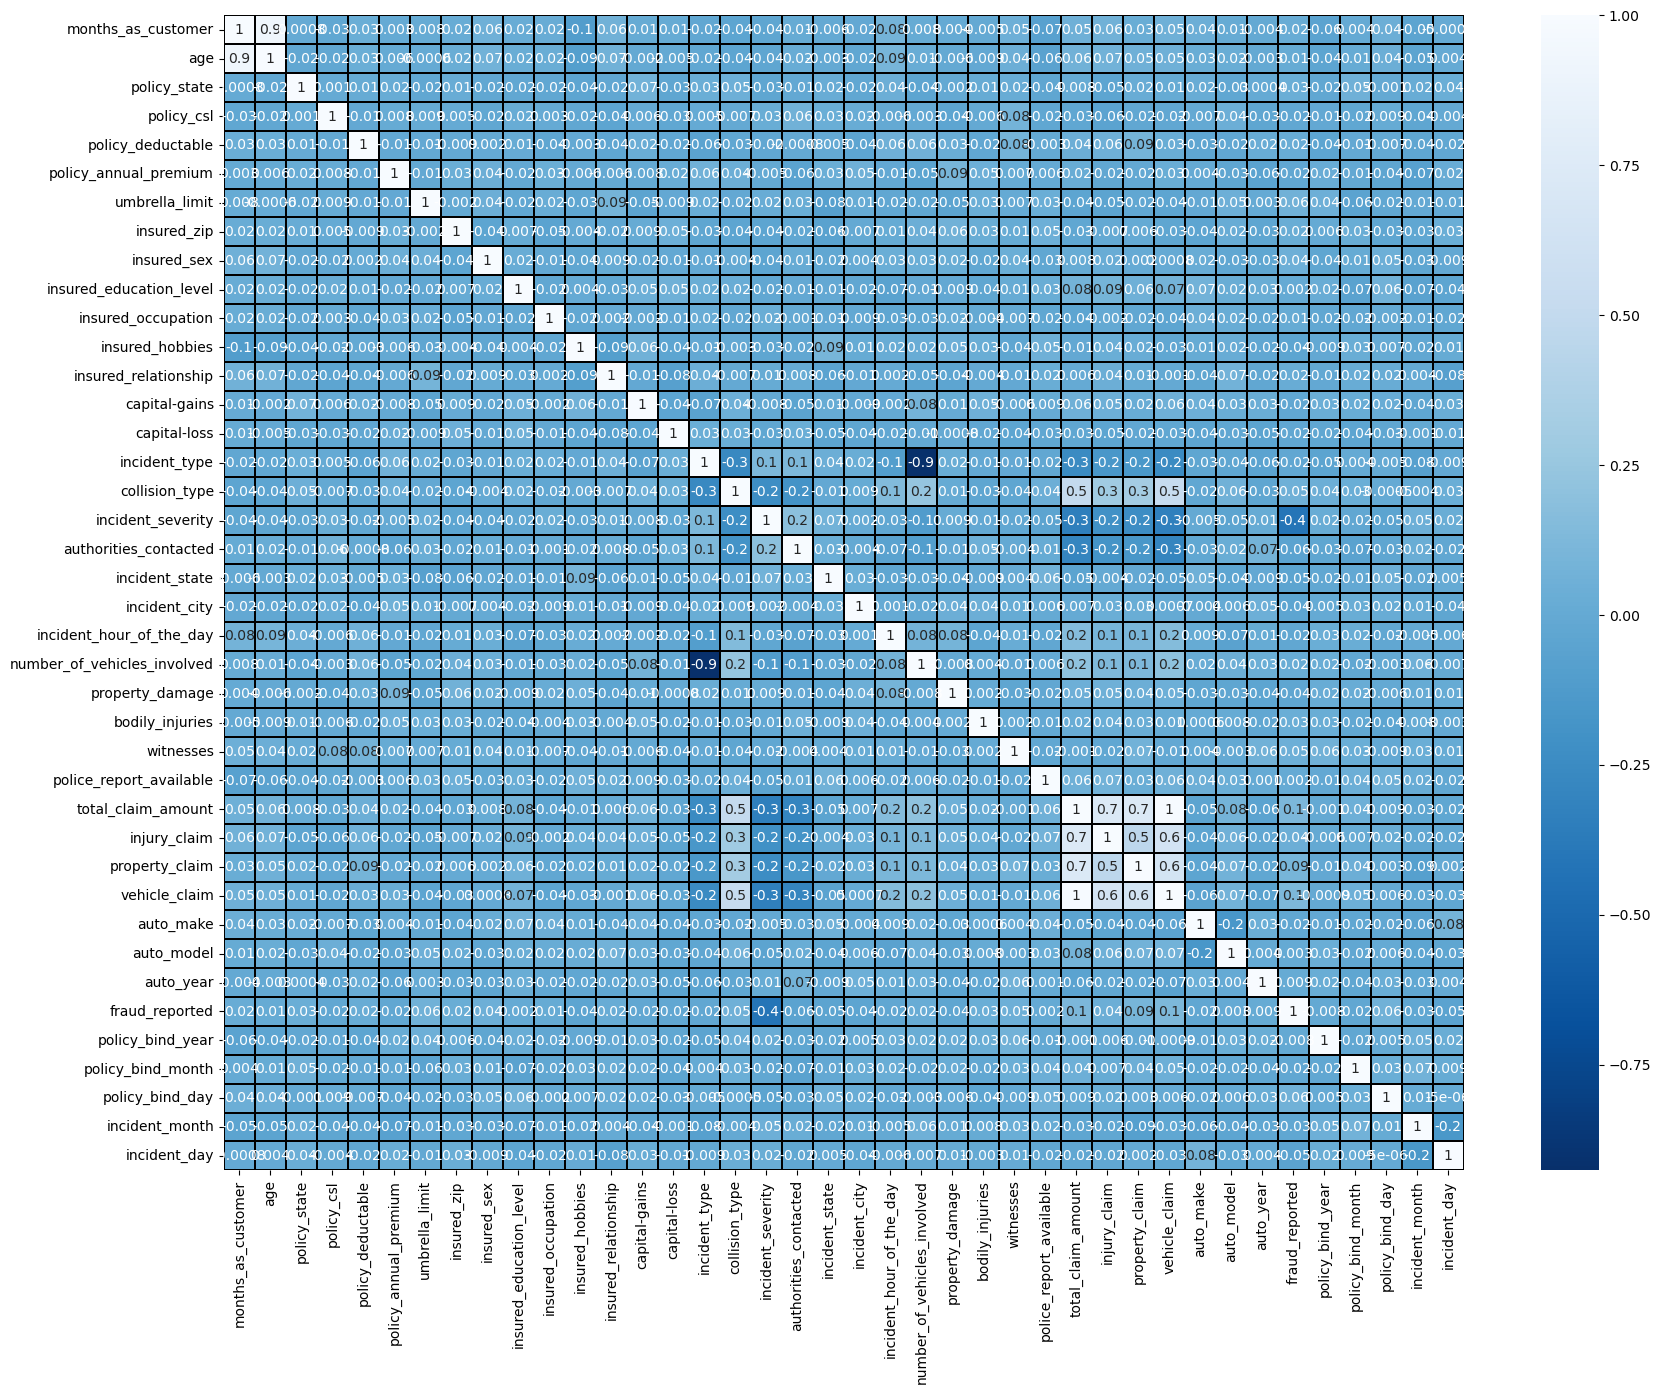

In [482]:
# visualization of correlation by heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(cor,linewidths = .1,fmt='.1g',linecolor = 'black',annot = True,cmap = 'Blues_r')
plt.yticks(rotation =0)
plt.show()

In [483]:
cor['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.123988
total_claim_amount             0.118534
property_claim                 0.091455
umbrella_limit                 0.062307
policy_bind_day                0.059763
collision_type                 0.052239
witnesses                      0.051339
insured_sex                    0.044894
injury_claim                   0.038400
policy_state                   0.034799
bodily_injuries                0.034726
insured_zip                    0.024215
months_as_customer             0.018345
number_of_vehicles_involved    0.018269
policy_deductable              0.017593
insured_relationship           0.015406
age                            0.011174
insured_occupation             0.009954
auto_year                      0.009445
auto_model                     0.003409
police_report_available        0.001848
insured_education_level        0.001668
policy_bind_year              -0.008210
policy_annual_premium         -0.016294


so incident severity is moderately correlated with the target column (fraud_reported). otherwise every column has very less correlated with the target column 

In [484]:
df['fraud_reported'].value_counts()

fraud_reported
0.0    668
1.0    241
Name: count, dtype: int64

In [485]:
df.dropna(inplace=True)

In [16]:
# separating x and y 

In [486]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [487]:
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_year,policy_bind_month,policy_bind_day,incident_month,incident_day
0,328,48,2.0,1.0,1000,1406.91,0.000000,682.738603,1.0,4.0,...,13020,228.210429,10.0,1.0,2004,2014,10,17,1,25
1,228,42,1.0,1.0,2000,1197.22,2236.067977,684.233878,1.0,4.0,...,780,59.245253,8.0,12.0,2007,2006,6,27,1,21
2,134,29,2.0,0.0,2000,1413.14,2236.067977,656.225571,0.0,6.0,...,3850,151.986842,4.0,30.0,2007,2000,9,6,2,22
3,256,41,0.0,1.0,2000,1415.74,2449.489743,779.818569,0.0,6.0,...,6340,225.211012,3.0,34.0,2014,1990,5,25,1,10
5,256,39,2.0,1.0,1000,1351.10,0.000000,691.705139,0.0,6.0,...,6410,226.450878,10.0,3.0,2003,2006,10,12,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.0,2.0,1000,1310.80,0.000000,656.725970,0.0,5.0,...,8720,247.062745,6.0,6.0,2006,1991,7,16,2,22
996,285,41,0.0,0.0,1000,1436.79,0.000000,779.857038,0.0,6.0,...,18080,268.923781,13.0,28.0,2015,2014,1,5,1,24
997,130,34,2.0,1.0,500,1383.49,1732.050808,665.429936,0.0,5.0,...,7500,229.128785,11.0,19.0,1996,2003,2,17,1,23
998,458,62,0.0,2.0,2000,1356.92,2236.067977,664.615678,1.0,0.0,...,5220,191.154388,1.0,5.0,1998,2011,11,18,2,26


In [488]:
y

0      1.0
1      1.0
2      0.0
3      1.0
5      1.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: fraud_reported, Length: 908, dtype: float64

In [489]:
x.shape

(908, 39)

In [490]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
st= StandardScaler()
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_year,policy_bind_month,policy_bind_day,incident_month,incident_day
0,1.061101,0.975082,1.191912,0.079357,-0.216087,0.613333,-0.494653,-0.470079,1.092354,0.523941,...,1.092904,0.616848,0.858487,-1.634042,-0.189075,1.669223,0.985074,0.172071,-0.942645,1.168302
1,0.198834,0.322311,-0.010595,0.079357,1.418970,-0.241771,1.894475,-0.439685,1.092354,0.523941,...,-1.601350,-2.696164,0.362933,-0.647115,0.310479,0.587771,-0.148573,1.307536,-0.942645,0.705113
2,-0.611696,-1.092025,1.191912,-1.162996,1.418970,0.638739,1.894475,-1.008996,-0.915454,1.552563,...,-0.925585,-0.877718,-0.628174,0.967856,0.310479,-0.223317,0.701663,-1.076942,0.959403,0.820910
3,0.440269,0.213516,-1.213101,0.079357,1.418970,0.649342,2.122506,1.503215,-0.915454,1.552563,...,-0.377489,0.558036,-0.875951,1.326739,1.476106,-1.575132,-0.431984,1.080443,-0.942645,-0.568656
4,0.440269,-0.004074,1.191912,0.079357,-0.216087,0.385743,-0.494653,-0.287821,-0.915454,1.552563,...,-0.362081,0.582347,0.858487,-1.454601,-0.355593,0.587771,0.985074,-0.395662,-0.942645,-1.495033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-1.741265,-0.112869,1.191912,1.321711,-0.216087,0.221402,-0.494653,-0.998825,-0.915454,1.038252,...,0.146394,0.986498,-0.132621,-1.185439,0.143961,-1.439950,0.134839,0.058524,0.959403,0.820910
904,0.690326,0.213516,-1.213101,-1.162996,-0.216087,0.735182,-0.494653,1.503997,-0.915454,1.552563,...,2.206705,1.415141,1.601817,0.788415,1.642624,1.669223,-1.565632,-1.190488,-0.942645,1.052505
905,-0.646187,-0.548049,1.191912,0.079357,-1.033615,0.517828,1.355958,-0.821904,-0.915454,1.038252,...,-0.122151,0.634855,1.106264,-0.019071,-1.521220,0.182227,-1.282220,0.172071,-0.942645,0.936707
906,2.182047,2.498213,-1.213101,1.321711,1.418970,0.409477,1.894475,-0.838455,1.092354,-1.533305,...,-0.624022,-0.109734,-1.371505,-1.275159,-1.188184,1.263678,1.268486,0.285617,0.959403,1.284099


In [491]:
for i in x:
    print(x[i].value_counts())
    print('\n')

months_as_customer
 0.690326    7
-0.663432    7
 0.216079    7
 0.423023    7
 0.431646    6
            ..
-1.249774    1
 2.087198    1
 1.802650    1
 1.268044    1
-1.620548    1
Name: count, Length: 384, dtype: int64


age
 0.431106    45
 0.213516    43
-0.004074    43
-0.112869    40
-0.221664    39
-0.983229    38
-0.765639    36
-0.548049    36
-0.874434    35
-0.656844    35
 0.104721    34
-1.092025    32
 0.757492    31
-0.330459    29
 0.322311    29
 0.539902    29
-1.200820    28
-0.439254    26
-1.418410    25
 0.648697    24
 0.975082    23
 0.866287    22
-1.309615    21
 1.954237    14
 1.192672    13
 1.519057    13
 1.736647    12
-1.527205    12
 1.627852    10
 2.389418    10
 1.083877     9
 2.280623     9
 1.845442     8
 1.301467     8
-1.636000     8
 2.063032     8
-1.744795     7
-1.962385     6
 1.410262     4
 2.498213     4
 2.171828     4
 2.715803     2
-2.179975     1
-2.071180     1
-1.853590     1
 2.607008     1
Name: count, dtype: int64


policy_

In [492]:
print(x.isnull().sum())


months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

In [493]:
#null_rows = df[df['umbrella_limit'].isnull()]
#print(null_rows)


In [494]:
#x.dropna(inplace=True)

In [495]:
#oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

In [496]:
y1.value_counts()

fraud_reported
1.0    667
0.0    667
Name: count, dtype: int64

Now our target classes are balanced

In [17]:
# Importing some basic metrices 

In [497]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
# checking the best random_state value

In [498]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    RFC=RandomForestClassifier(n_jobs=-1)
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best acc :',maxacc,  'random_state :',maxrs) 

best acc : 0.9363295880149812 random_state : 172


In [19]:
# separating our train and test dataset based on the best random_state values

In [499]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=maxrs)

In [500]:
x_train1,x_test1,y_train1,y_test1=x_train.copy(),x_test.copy(),y_train.copy(),y_test.copy()

In [501]:
from sklearn.model_selection import cross_val_score

In [20]:
# Importing SequentialFeatureSelector for feature selection purpose

In [502]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [503]:
RFC = RandomForestClassifier()
sfs = SFS(RFC, k_features='best', forward=True, floating=False, scoring='accuracy',cv=5)

sfs.fit(x_train1, y_train1)

SequentialFeatureSelector(estimator=RandomForestClassifier(),
                          k_features=(1, 39), scoring='accuracy')

In [21]:
# checking the indexes for the new columns

In [504]:
sfs.k_feature_idx_

(3, 9, 11, 12, 13, 17, 35)

In [22]:
# checking the new best columns 

In [505]:
selected_columns = sfs.k_feature_names_

print("Selected features:")
print(selected_columns)

Selected features:
('policy_csl', 'insured_education_level', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'incident_severity', 'policy_bind_month')


In [23]:
# transforming our dataset for the best columns 

In [506]:
x_train_2 = sfs.transform(x_train1)
x_test_2 = sfs.transform(x_test1)

model = RandomForestClassifier()

print("training",np.mean(cross_val_score(model, x_train_2, y_train, cv=5, scoring='accuracy')))
print("testing",np.mean(cross_val_score(model, x_test_2, y_test, cv=5, scoring='accuracy')))

training 0.8706375323592648
testing 0.8575122292103424


In [24]:
# Converting into dataframe

In [507]:
x_train_sfs = pd.DataFrame(x_train_2,columns=selected_columns)
x_test_sfs= pd.DataFrame(x_test_2,columns=selected_columns)

In [508]:
x_train_sfs

,policy_csl,insured_education_level,insured_hobbies,insured_relationship,capital-gains,incident_severity,policy_bind_month
0,1.321711,0.523941,-1.184668,1.546746,-0.896913,-0.125713,-0.715396
1,1.321711,1.038252,-1.184668,1.546746,-0.896913,0.982512,0.985074
2,1.321711,0.009629,1.109266,-1.435091,-0.896913,-1.233937,0.701663
3,0.079357,-1.533305,-1.361125,0.950378,-0.896913,-1.233937,0.134839
4,0.079357,0.009629,0.050527,0.950378,0.276065,2.090737,0.985074
...,...,...,...,...,...,...,...
1062,1.321711,-1.533305,0.050527,-0.838724,-0.896913,-0.125713,-0.715396
1063,0.079357,1.038252,1.462179,-1.435091,0.521488,0.982512,-0.715396
1064,-1.162996,0.009629,0.756353,-0.838724,-0.896913,0.982512,1.268486
1065,-1.162996,-1.018994,0.579897,-0.242356,0.813831,-1.233937,-1.282220


In [25]:
# Importing almost all the classification algorithmns

In [509]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [26]:
# making their instances 

In [510]:
RFC=RandomForestClassifier(n_jobs=-1)
ET=ExtraTreesClassifier(n_jobs=-1)
LR=LogisticRegression(n_jobs=-1)
svc=SVC()
GBC=GradientBoostingClassifier()
ADC=AdaBoostClassifier()
BC=BaggingClassifier(n_jobs=-1)
DTC=DecisionTreeClassifier()
KNN=KNeighborsClassifier(n_jobs=-1)
MNB=MultinomialNB()
GNB=GaussianNB()

In [511]:
loop = [RFC,ET,LR,svc,GBC,ADC,BC,DTC,KNN,GNB]

In [512]:
from sklearn.metrics import roc_auc_score

In [27]:
# Running a loop to train all the models separately and checking the corresponding metrices. And compare these metrices with the cross_val_score 

In [514]:
for i in loop:
    i.fit(x_train_sfs,y_train)
    pred=i.predict(x_test_sfs)
    print('This is for :',i)
    print('accuracy_score will be :',accuracy_score(y_test,pred))
    print('confusion matrix will be :','\n')
    print(confusion_matrix(y_test,pred))
    print('classification report will be :','\n')
    print(classification_report(y_test,pred))
    
    score= cross_val_score(i,x_train_sfs,y_train,cv=5,scoring='roc_auc')
    print('Cross val score will be :',score)
    print('Mean cv :',score.mean())
    print('Difference between cv and accuracy_score will be :',accuracy_score(y_test,pred)-score.mean())
    print('\n')

This is for : RandomForestClassifier(n_jobs=-1)
accuracy_score will be : 0.9176029962546817
confusion matrix will be : 

[[130  11]
 [ 11 115]]
classification report will be : 

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       141
         1.0       0.91      0.91      0.91       126

    accuracy                           0.92       267
   macro avg       0.92      0.92      0.92       267
weighted avg       0.92      0.92      0.92       267

Cross val score will be : [0.92426625 0.9477938  0.93104056 0.91895944 0.93972663]
Mean cv : 0.9323573350380805
Difference between cv and accuracy_score will be : -0.014754338783398824


This is for : ExtraTreesClassifier(n_jobs=-1)
accuracy_score will be : 0.9213483146067416
confusion matrix will be : 

[[126  15]
 [  6 120]]
classification report will be : 

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       141
         1.0       0.89

The accuracy score is 0.9213, which is a good score indicating that your model has correctly classified about 92.13% of the predictions.
The confusion matrix shows that your model made 126 true positive predictions and 120 true negative predictions. However, there were 15 false positives and 6 false negatives.

The cross-validation scores are quite high, ranging from 0.9060 to 0.9438, with a mean cross-validation score of 0.9268. This indicates that your model is not overfitting and is expected to perform similarly on unseen data.
The difference between the mean cross-validation score and the accuracy score is -0.0054. This negative value indicates that your model is performing slightly better in cross-validation than on the test set.

In [28]:
# Importing grid search CV for hyper parameter tuning

In [515]:
from sklearn.model_selection import GridSearchCV

In [29]:
# setting the best parameters for ExtraTreesClassifier, to feed this into GCV

In [516]:
parameters = {'n_estimators':[100,150,200],'criterion':['gini','entropy','log_loss'],'n_jobs':[-1],'max_leaf_nodes':[2,4,5,None],'max_depth':[2,3,4,5,None]}

In [517]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=5,n_jobs=-1)

In [518]:
GCV.fit(x_train_sfs,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, None],
                         'max_leaf_nodes': [2, 4, 5, None],
                         'n_estimators': [100, 150, 200], 'n_jobs': [-1]})

In [30]:
# Best parameters

In [520]:
GCV.best_params_

{'criterion': 'log_loss',
 'max_depth': None,
 'max_leaf_nodes': None,
 'n_estimators': 150,
 'n_jobs': -1}

In [31]:
# Now use these best parameters to train our model. and this model is going to be our final model 

In [521]:
final_model = ExtraTreesClassifier(criterion = "log_loss",max_depth=None,max_leaf_nodes=None,n_estimators=150,n_jobs=-1)
final_model.fit(x_train_sfs,y_train)
pred=final_model.predict(x_test_sfs)
acc=accuracy_score(y_test,pred)
print(acc*100)

92.50936329588015


So our final accuracy_score is 92.5%

In [522]:
# Lets save our model
import joblib
filename = 'insurance_claim.pkl'
joblib.dump(final_model, filename)
model = joblib.load(filename)

In [32]:
# Lets plot ROC_AUC plot

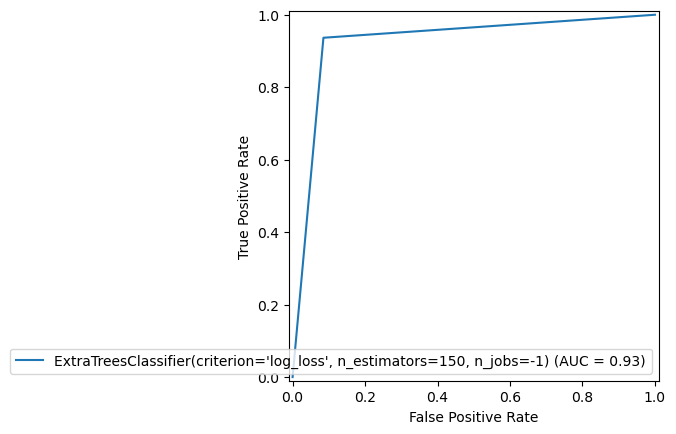

In [523]:
from sklearn import metrics
fpr,tpr,thresolds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [33]:
# AUC_score

In [524]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,pred)
auc_score

0.9257007767646065

In [34]:
# Lets test our model

In [527]:
t=np.array([0.079357,	-1.533305,	-1.361125,	0.950378,	-0.896913,	-1.233937,	0.134839]).reshape(1,-1)
final_model.predict(t)    #1

array([1.])

In [528]:
t=np.array([1.321711,	0.523941,	-1.184668,	1.546746,	-0.896913,	-0.125713,	-0.715396]).reshape(1,-1)
final_model.predict(t)    #0

array([0.])

In [525]:
x_train_sfs

,policy_csl,insured_education_level,insured_hobbies,insured_relationship,capital-gains,incident_severity,policy_bind_month
0,1.321711,0.523941,-1.184668,1.546746,-0.896913,-0.125713,-0.715396
1,1.321711,1.038252,-1.184668,1.546746,-0.896913,0.982512,0.985074
2,1.321711,0.009629,1.109266,-1.435091,-0.896913,-1.233937,0.701663
3,0.079357,-1.533305,-1.361125,0.950378,-0.896913,-1.233937,0.134839
4,0.079357,0.009629,0.050527,0.950378,0.276065,2.090737,0.985074
...,...,...,...,...,...,...,...
1062,1.321711,-1.533305,0.050527,-0.838724,-0.896913,-0.125713,-0.715396
1063,0.079357,1.038252,1.462179,-1.435091,0.521488,0.982512,-0.715396
1064,-1.162996,0.009629,0.756353,-0.838724,-0.896913,0.982512,1.268486
1065,-1.162996,-1.018994,0.579897,-0.242356,0.813831,-1.233937,-1.282220


In [526]:
y_train

279    0.0
369    0.0
790    1.0
145    1.0
892    0.0
      ... 
508    0.0
637    1.0
334    0.0
322    1.0
794    0.0
Name: fraud_reported, Length: 1067, dtype: float64